In [6]:
#IMPORTS
import pandas as pd
import numpy as np
import re

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

In [7]:
#DEFINES - CHANGE PER NEED
RAW_GK_XLSX_PATH = "../DataSets/all_goalkeepers.xlsx"
CLEAN_GK_XLSX_PATH = "../DataSets/cleaned_all_goalkeepers.xlsx"

In [8]:
#FUNCTIONS

"""Remove zeroes from a column"""
def remove_zeroes(dataframe, column_name):
    return dataframe[dataframe[column_name] != "0/0"]


"""Convert the date into the properly formatted fraction"""
def convert_date_string_to_fraction(value):
    if isinstance(value, str) and re.match(r"\d{4}-\d{2}-\d{2}", value):
        date_part = value[:10]
        date_obj = datetime.strptime(date_part, "%Y-%m-%d")
        return f"{date_obj.month}/{date_obj.day}"
    elif pd.isnull(value):
        return "0/0"
    else:
        return value


"""Convert the PKG/A to decimal form"""
def convert_fraction_to_decimal(fraction_str):
    try:
        numerator, denominator = fraction_str.split("/")
        return float(numerator) / float(denominator)
    except ValueError:
        return None

"""Displaying boxplots with outliers in red with their numbered index"""
def boxplots(dataframe):
    num_cols = dataframe.select_dtypes(include=["number"]).columns.tolist()
    for col in num_cols:
        plt.figure(figsize=(10, 6))
        bp = plt.boxplot(
            dataframe[col].dropna(), flierprops=dict(markerfacecolor="r", marker="o")
        )

        for flier in bp["fliers"]:
            y = flier.get_ydata()
            x = flier.get_xdata()
            for i in range(len(y)):

                plt.text(
                    x[i],
                    y[i],
                    f"{dataframe[col][dataframe[col] == y[i]].index[0]}",
                    color="blue",
                )

        plt.title(col)
        plt.show()

"""Remove the outliers"""
def remove_outliers(dataframe):
    indices_to_drop = set()
    num_cols = dataframe.select_dtypes(include=["number"]).columns.tolist()

    for col in num_cols:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_indices = dataframe[
            (dataframe[col] < (Q1 - 1.5 * IQR)) | (dataframe[col] > (Q3 + 1.5 * IQR))
        ].index
        indices_to_drop.update(outlier_indices)

    cleaned_dataframe = dataframe.drop(index=list(indices_to_drop))
    return cleaned_dataframe

------------------------------------------STAT MAP------------------------------------------
GP - Games Played
GS - Games Started
MINS - Minutes Played
SHTS - Shots
SV - Saves
GA - Goals Allowed
GAA - Goals Against Average
PKG/A - Penalty Kicks Goals/Attempts
W - Wins
L - Losses
T - Ties
ShO - Shutouts
W% - Winning Percentage
Sv% - Save Percentage
Year - Year
Season - Season

------------------------------------------GOAL KEEPERS DATA------------------------------------------

In [9]:
#READ-IN/WRITE-OUT
""" Reading the excel file into a pandas dataframe"""
data = pd.read_excel(RAW_GK_XLSX_PATH)

""" Converting column to strings"""
data["PKG/A"] = data["PKG/A"].astype(str)


""" Applying the function to the column and verifying the results after removing the zeroes"""
data = remove_zeroes(data, "PKG/A")
data["PKG/A"] = data["PKG/A"].apply(convert_date_string_to_fraction)
print(data["PKG/A"].head())


""" Creating a cleaned file without NA values"""

clean_data = data.dropna()
clean_data["PKG/A"] = clean_data["PKG/A"].apply(convert_fraction_to_decimal)
clean_data.to_excel(CLEAN_GK_XLSX_PATH)

clean_data = pd.read_excel(CLEAN_GK_XLSX_PATH)

0     5/5
1     3/4
2    9/10
3     0/1
4     2/2
Name: PKG/A, dtype: object


/var/folders/lp/cmhcqvln18lghd5g5ywl97cr0000gp/T/ipykernel_1700/2944007020.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["PKG/A"] = clean_data["PKG/A"].apply(convert_fraction_to_decimal)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  616 non-null    int64  
 1   Player      616 non-null    object 
 2   Club        616 non-null    object 
 3   POS         616 non-null    object 
 4   GP          616 non-null    int64  
 5   GS          616 non-null    int64  
 6   MINS        616 non-null    int64  
 7   SHTS        616 non-null    int64  
 8   SV          616 non-null    int64  
 9   GA          616 non-null    int64  
 10  GAA         616 non-null    float64
 11  PKG/A       616 non-null    float64
 12  W           616 non-null    int64  
 13  L           616 non-null    int64  
 14  T           616 non-null    int64  
 15  ShO         616 non-null    int64  
 16  W%          616 non-null    float64
 17  Sv%         616 non-null    float64
 18  Year        616 non-null    int64  
 19  Season      616 non-null    o

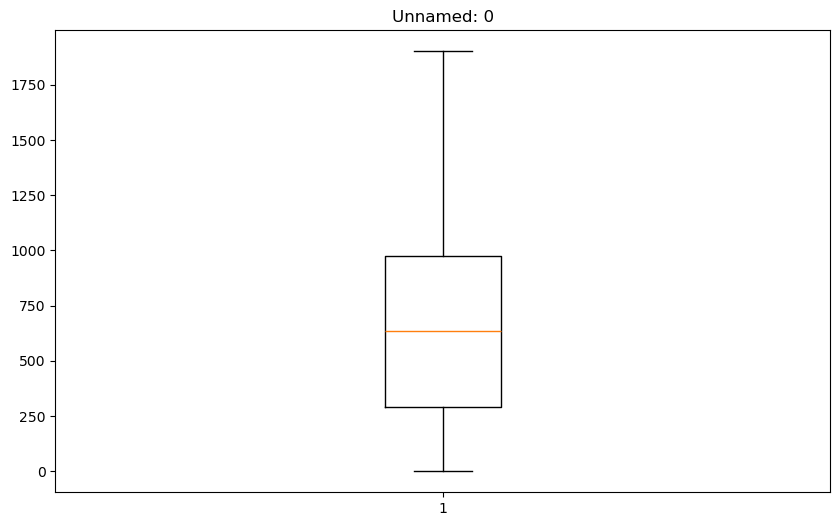

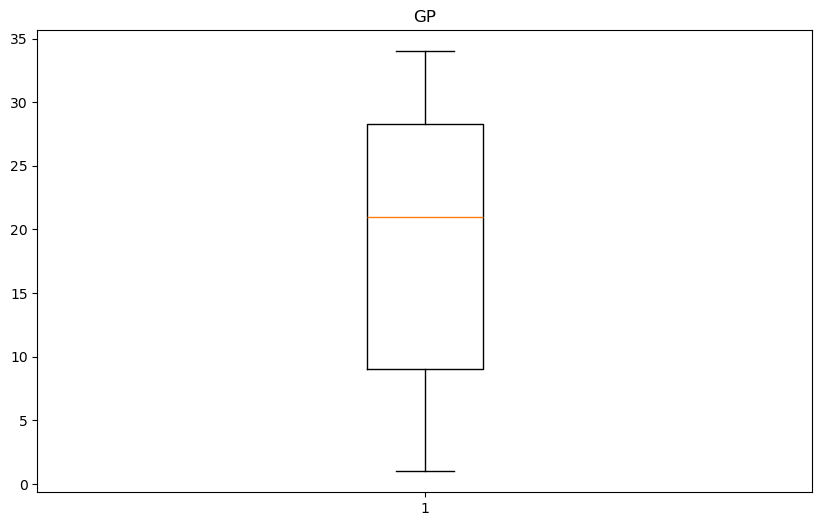

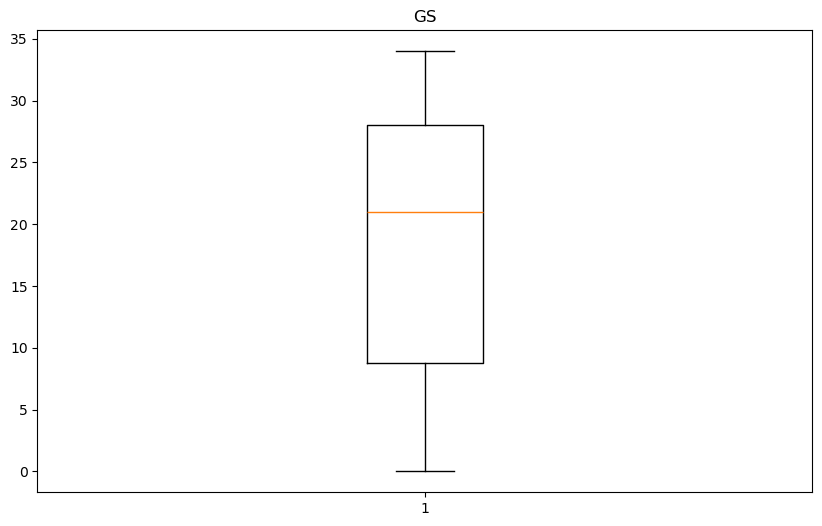

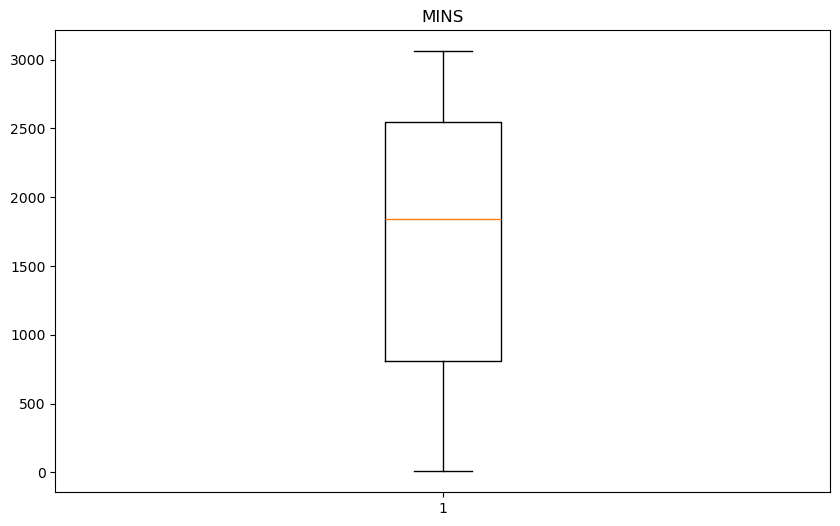

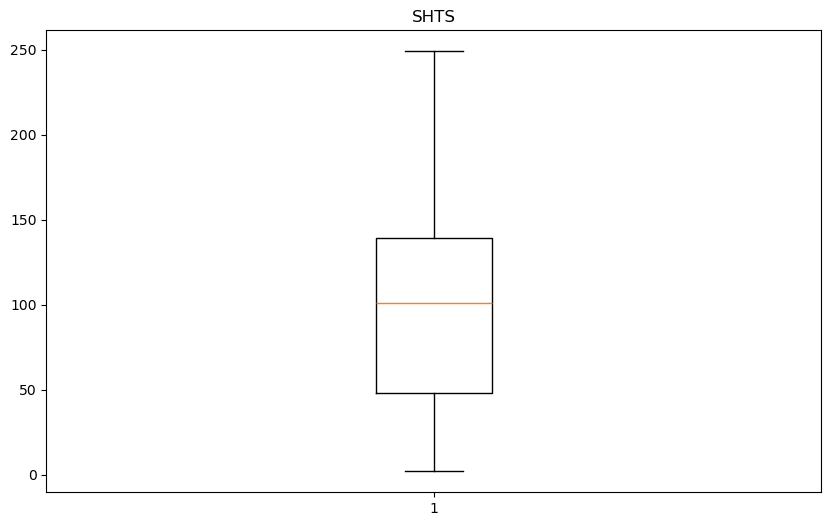

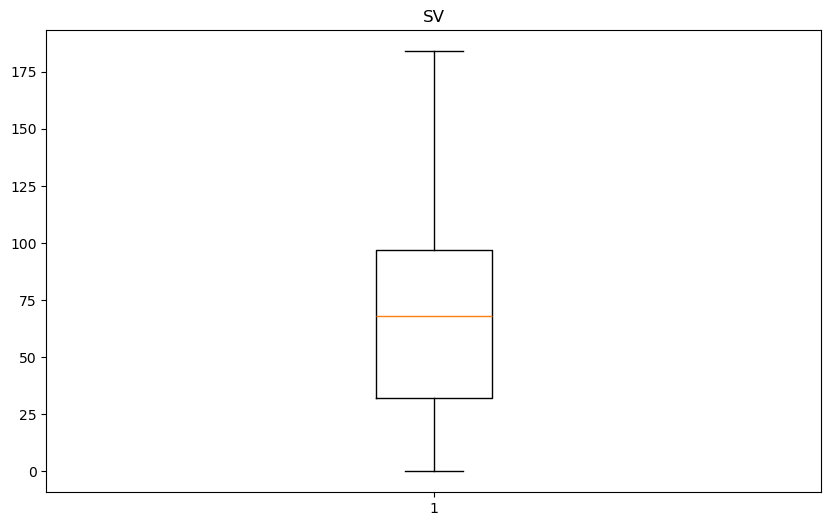

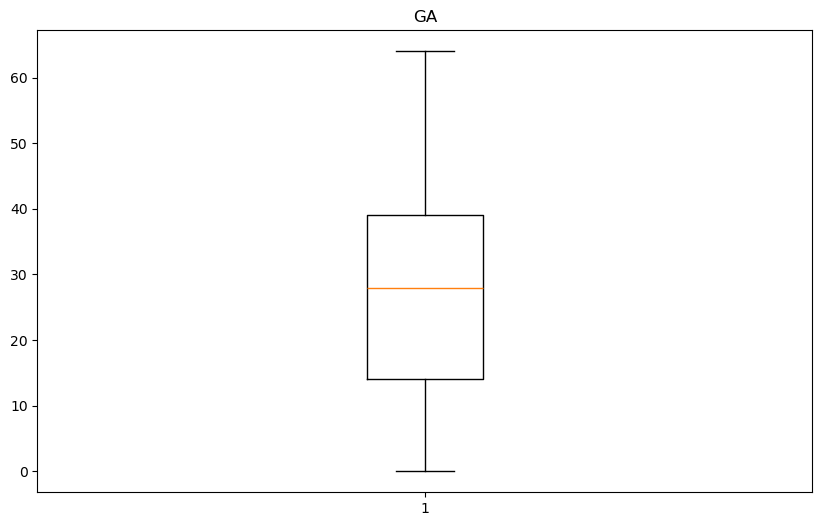

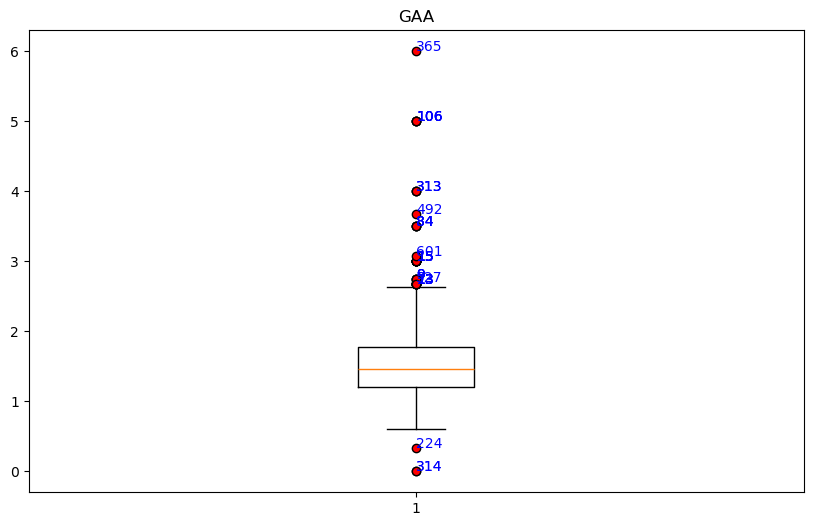

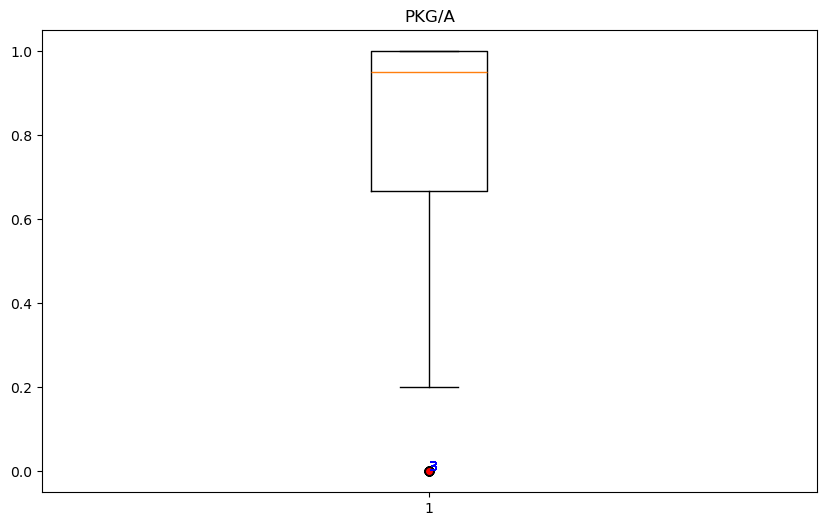

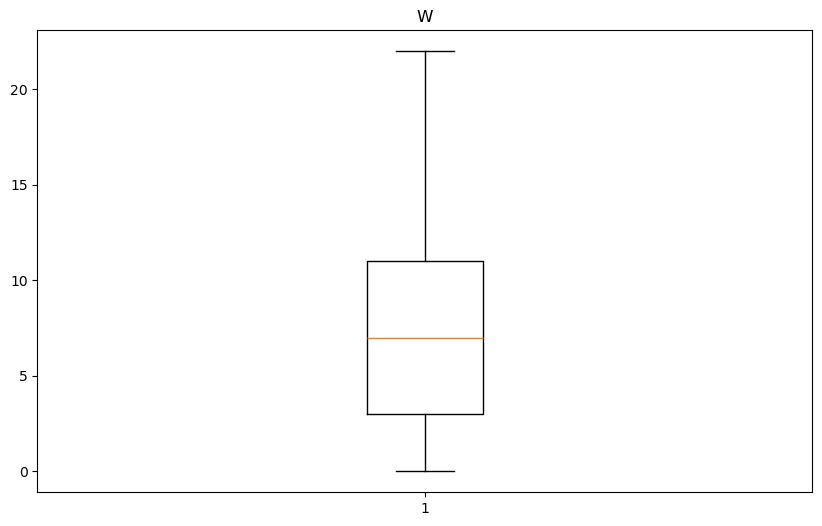

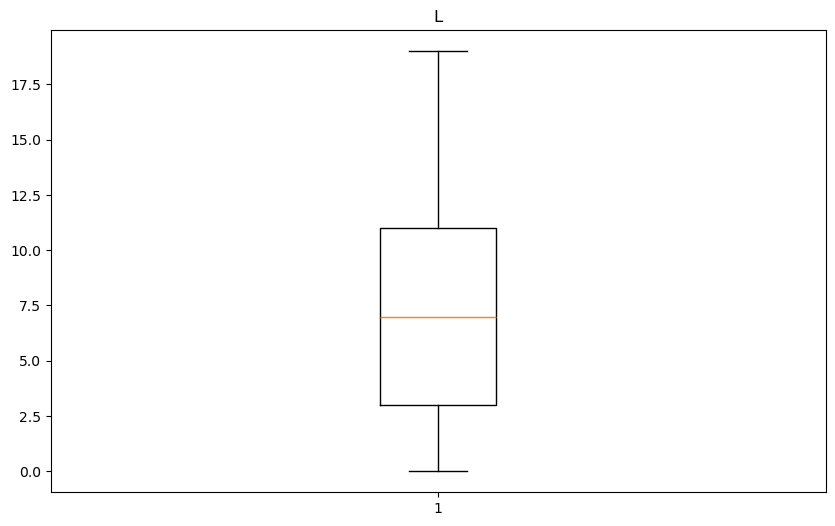

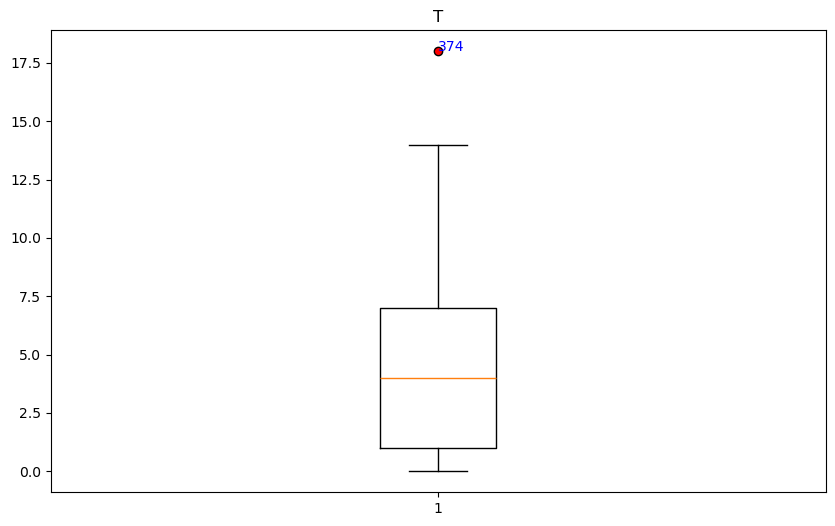

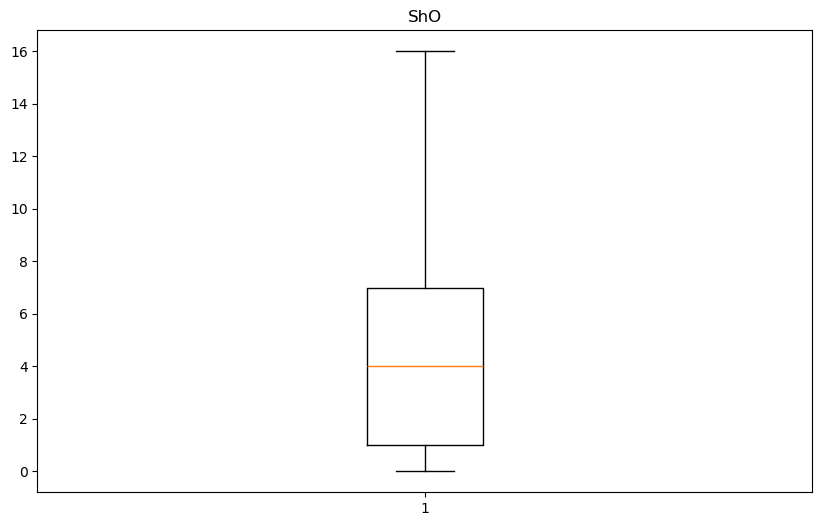

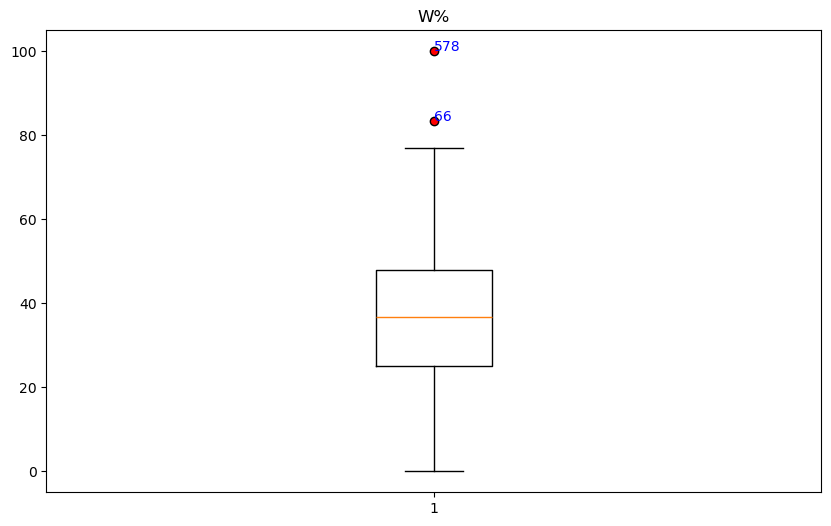

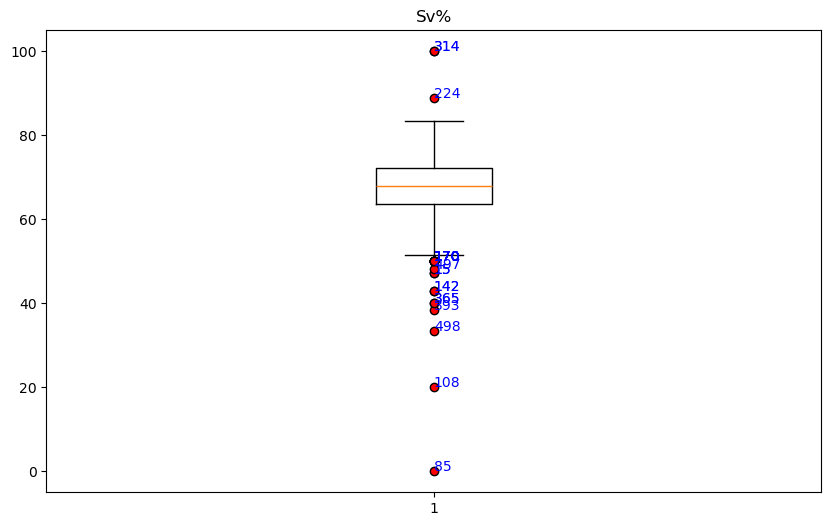

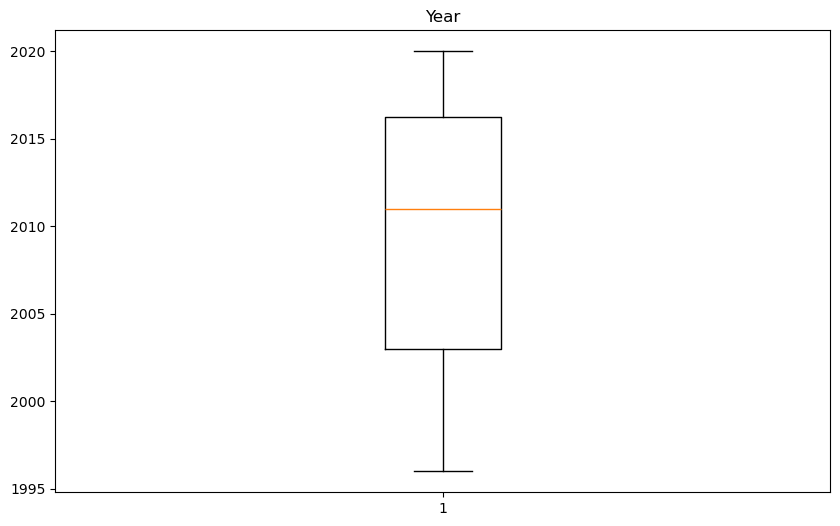

     Unnamed: 0          Player Club POS  GP  GS  MINS  SHTS   SV  GA   GAA  \
0             0       Mark Dodd  DAL  GK  31  31  2776   235  160  45  1.45   
1             1      Tony Meola  MET  GK  29  29  2610   188  142  38  1.31   
2             2  Mark Dougherty  TB   GK  28  28  2520   186  123  47  1.68   
4             4  Garth Lagerwey  KC   GK  23  22  1959   133   83  38  1.73   
5             5     Chris Woods  COL  GK  23  23  2070   149   96  43  1.87   
..          ...             ...  ...  ..  ..  ..   ...   ...  ...  ..   ...   
606        1883       Evan Bush  VAN  GK   8   8   720    32   22  10  1.25   
607        1884  Andrew Tarbell  CLB  GK   7   6   559    24   17   6  1.00   
608        1888    Tyler Miller  MIN  GK   5   5   450    19   13   6  1.20   
609        1889     Kyle Zobeck  DAL  GK   4   3   318    18   11   6  2.00   
610        1890  Maxime Crepeau  VAN  GK   4   4   328    22   12  10  2.50   

     PKG/A   W   L  T  ShO    W%   Sv%  Year Season

In [10]:
#POST-PROCESSING
""" Cleaned data has 616 observations"""
print(clean_data.info())
print(data.info())


""" Display the box plots"""
boxplots(clean_data)


""" Removing and viewing results"""
clean_data_no_outliers = remove_outliers(clean_data)
print(clean_data_no_outliers)

""" 513 entries"""
clean_data_no_outliers.info()

In [11]:
""" ------------------------------------------MATCHES DATA------------------------------------------ """
# print("Matches Data ------------------------------------")
# data = pd.read_excel("Soccer:Football/DataSets/matches.xlsx")


# print("Cleaned Matches ----- ")
# clean_matches_data = data.dropna(thresh=len(data.columns) - 75)
# clean_matches_data.info()

# clean_matches_data.to_excel("Soccer:Football/DataSets/cleaned_matches.xlsx")
# missing_info = clean_matches_data.isnull().sum() / len(data)
# print(missing_info)


' ------------------------------------------MATCHES DATA------------------------------------------ '